In [2]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_ex = pd.read_sas('extrel.sas7bdat')

In [4]:
data_ex.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [5]:
data_pay = pd.read_sas('payhistory.sas7bdat')
data_pay.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [189]:
data_namadd = pd.read_sas('nameaddr.sas7bdat')
data_namadd.head()


,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [215]:
data_comm = pd.read_sas('communication.sas7bdat')
data_comm.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [8]:
data_exac = pd.read_sas('extrelty.sas7bdat')
data_exac.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [9]:
data_ex.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [10]:
#for extrel data
data_ex.EXTRELNO = pd.to_numeric(data_ex.EXTRELNO)
data_ex.EXRELACTCD = data_ex.EXRELACTCD.apply(str)
data_ex.EXRELACTCD =data_ex.EXRELACTCD.apply(lambda x: x.replace('b',''))
data_ex.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,26414,'CT',1995-02-02,NaT
1,26419,'FP',1992-03-01,NaT
2,26424,'FP',1992-03-01,1996-12-24
3,26430,'FP',1992-03-01,2006-01-31
4,26430,'CT',1997-03-07,NaT


In [11]:
#for payhistory data
data_pay.head()
data_pay.PAYTYPECD = data_pay.PAYTYPECD.apply(str)
data_pay.PAYTYPECD =data_pay.PAYTYPECD.apply(lambda x: x.replace('b',''))
data_pay.EXTRELNO =pd.to_numeric(data_pay.EXTRELNO)
data_pay.STATUS = data_pay.STATUS.apply(str)
data_pay.STATUS =data_pay.STATUS.apply(lambda x: x.replace('b',''))
data_pay.PAYTYPECD = data_pay.PAYTYPECD.apply(lambda x: x.strip('"\''))
data_pay.STATUS = data_pay.STATUS.apply(lambda x: x.strip('"\''))

In [12]:
data_pay.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,19,X,CO
1,39.0,1993-12-31,41.32,20,X,CO
2,40.0,1993-12-31,13.10,20,X,CO
3,54091.0,1994-01-01,2.02,20,X,CO
4,104480.0,1994-05-19,0.50,20,D,OK


In [190]:
#for name address
data_namadd.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [191]:
#transforming data to usable form
data_namadd.EXTRELNO =pd.to_numeric(data_namadd.EXTRELNO)
data_namadd.NAME1TITLE = data_namadd.NAME1TITLE.apply(str)
data_namadd.NAME1TITLE =data_namadd.NAME1TITLE.apply(lambda x: x.replace('b',''))
data_namadd.LANGUACODE = data_namadd.LANGUACODE.apply(str)
data_namadd.LANGUACODE =data_namadd.LANGUACODE.apply(lambda x: x.replace('b',''))
data_namadd.NAME1TITLE = data_namadd.NAME1TITLE.apply(lambda x: x.strip('"\''))
data_namadd.LANGUACODE =data_namadd.LANGUACODE.apply(lambda x: x.strip('"\''))

##### Removing errornous data from dataframe

In [192]:
data_namadd.drop(data_namadd.index[[9412,4492,21347,21257,12238,4523,4981,4841,2580,21139,12576,11827,19043,7414,
18516,21499,18720,20413,3765,18194,20801,14796,19777,15856,5481,20175,20471,16354,20793,6756,21476,21989,
578,16061,19463,3947,21573,2122,1000,8291,11552,21543,11269,8509,7606,18763,12154,14192,14625,17308,22755,22552,
22055,11938,16548]], inplace= True)
data_namadd =data_namadd.drop(8377)
data_namadd =data_namadd.drop(24169)
data_namadd =data_namadd.drop(1734)
data_namadd =data_namadd.drop(4898)
data_namadd =data_namadd.drop(5455)
data_namadd =data_namadd.drop(7428)
data_namadd =data_namadd.drop(11959)
data_namadd =data_namadd.drop(16101)
data_namadd =data_namadd.drop(16369)
data_namadd =data_namadd.drop(18406)
data_namadd =data_namadd.drop(19834)
data_namadd =data_namadd.drop(19949)
data_namadd =data_namadd.drop(19979)
data_namadd =data_namadd.drop(20504)
data_namadd =data_namadd.drop(20585)
data_namadd =data_namadd.drop(20613)
data_namadd =data_namadd.drop(21194)
data_namadd =data_namadd.drop(21213)
data_namadd =data_namadd.drop(21303)
data_namadd =data_namadd.drop(21306)
data_namadd =data_namadd.drop(21455)
data_namadd =data_namadd.drop(21518)
data_namadd =data_namadd.drop(23364)
data_namadd =data_namadd.drop(21185)

In [195]:
data_namadd.POSTCODE =pd.to_numeric(data_namadd.POSTCODE)

In [216]:
#for communication
data_comm.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [217]:
data_comm.EXTRELNO =pd.to_numeric(data_comm.EXTRELNO)
data_comm.MEDIUMCODE = data_comm.MEDIUMCODE.apply(str)
data_comm.MEDIUMCODE =data_comm.MEDIUMCODE.apply(lambda x: x.replace('b',''))
data_comm.MNTOPCODE = data_comm.MNTOPCODE.apply(str)
data_comm.MNTOPCODE =data_comm.MNTOPCODE.apply(lambda x: x.replace('b',''))
data_comm.CLASCODE = data_comm.CLASCODE.apply(str)
data_comm.CLASCODE =data_comm.CLASCODE.apply(lambda x: x.replace('b',''))
data_comm.CONTDIREC = data_comm.CONTDIREC.apply(str)
data_comm.CONTDIREC =data_comm.CONTDIREC.apply(lambda x: x.replace('b',''))

In [219]:
data_comm.head()
#data_comm =data_comm.drop(columns = ['CONTID'])
data_comm.MEDIUMCODE =data_comm.MEDIUMCODE.apply(lambda x: x.strip('"\''))
data_comm.MNTOPCODE =data_comm.MNTOPCODE.apply(lambda x: x.strip('"\''))
data_comm.CLASCODE =data_comm.CLASCODE.apply(lambda x: x.strip('"\''))
data_comm.CONTDIREC =data_comm.CONTDIREC.apply(lambda x: x.strip('"\''))
data_comm= data_comm.drop(columns = 'CONTID')
data_comm.head()

,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,CI,CTS,CT,20,O,1994-05-09
1,CI,CTS,CT,20,O,1994-06-14
2,CI,CTS,CT,20,O,1994-10-21
3,CI,CTS,CT,20,O,1994-10-21
4,CI,CTS,CT,20,O,1994-11-28


In [199]:
#for extrelty
data_exac.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [200]:
data_exac.EXRELACTCD = data_exac.EXRELACTCD.apply(str)
data_exac.EXRELACTCD =data_exac.EXRELACTCD.apply(lambda x: x.replace('b',''))
data_exac.EXRELACTDE = data_exac.EXRELACTDE.apply(str)
data_exac.EXRELACTDE =data_exac.EXRELACTDE.apply(lambda x: x.replace('b',''))
data_exac.EXRELACTCD =data_exac.EXRELACTCD.apply(lambda x: x.strip('"\''))
data_exac.EXRELACTDE=data_exac.EXRELACTDE.apply(lambda x: x.strip('"\''))

In [201]:
data_exac.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


## Finding Active customers 

In [202]:
data_ex.EXRELACTCD = data_ex.EXRELACTCD.apply(lambda x: x.strip('"\''))
data_ex.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,26414,CT,1995-02-02,NaT
1,26419,FP,1992-03-01,NaT
2,26424,FP,1992-03-01,1996-12-24
3,26430,FP,1992-03-01,2006-01-31
4,26430,CT,1997-03-07,NaT


In [203]:
cust_active = data_ex[(data_ex['EXRELACTCD']=='FP') & (~(data_ex['EXRELDATEN'] <'2006-01-01')) & (data_ex['EXTRELSTDT']<'2005-12-03')]

In [204]:
cust_active.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
1,26419,FP,1992-03-01,NaT
3,26430,FP,1992-03-01,2006-01-31
5,26431,FP,1992-03-01,NaT
7,26443,FP,1992-03-01,NaT
8,26444,FP,1992-03-01,NaT


#### Finding Churners

In [206]:
cust_active['Churn'] = np.where(cust_active['EXRELDATEN'].isnull(), 0, 1)

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [207]:
cust_active.EXTRELSTDT = pd.to_datetime(cust_active.EXTRELSTDT)
cust_active.head()

C:\Users\thebu\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Churn
1,26419,FP,1992-03-01,NaT,0
3,26430,FP,1992-03-01,2006-01-31,1
5,26431,FP,1992-03-01,NaT,0
7,26443,FP,1992-03-01,NaT,0
8,26444,FP,1992-03-01,NaT,0


##### extracting starting year of relnship bw customer and organization

In [209]:
cust_active['STARTYEAR'] = pd.DatetimeIndex(cust_active['EXTRELSTDT']).year
cust_active.head()

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Churn,STARTYEAR
1,26419,FP,1992-03-01,NaT,0,1992
3,26430,FP,1992-03-01,2006-01-31,1,1992
5,26431,FP,1992-03-01,NaT,0,1992
7,26443,FP,1992-03-01,NaT,0,1992
8,26444,FP,1992-03-01,NaT,0,1992


#### Calculating Frequency 

Text(0.5, 1.0, 'Frequency distribution for active customers')

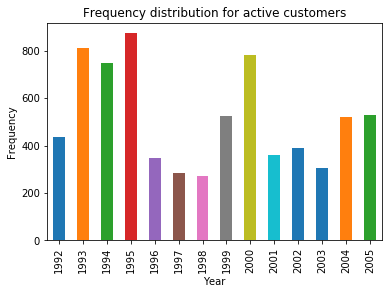

In [210]:
count= cust_active['STARTYEAR'].value_counts()
axes = count.sort_index().plot.bar()
axes.set_xlabel('Year')
axes.set_ylabel('Frequency')
axes.set_title('Frequency distribution for active customers')

#### Calculating Frequency, Recency, Total and average donation per donor

In [211]:
data_pay.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,19,X,CO
1,39.0,1993-12-31,41.32,20,X,CO
2,40.0,1993-12-31,13.10,20,X,CO
3,54091.0,1994-01-01,2.02,20,X,CO
4,104480.0,1994-05-19,0.50,20,D,OK


In [220]:
col1 = pd.DataFrame(data_pay.groupby('EXTRELNO')['PAMT'].agg('count')) 
col2 = pd.DataFrame(data_pay.groupby('EXTRELNO')['PAMT'].agg('mean'))
col3 =  pd.DataFrame(data_pay.groupby('EXTRELNO')['PAMT'].agg('sum'))
col4 = data_pay.sort_values(ascending=0, by='PDATE').groupby('EXTRELNO')['PDATE'].nth(0)
col5 = data_comm.sort_values(ascending=0, by='CONTDATE').groupby('EXTRELNO').nth(0)
fin_col = pd.concat([col1,col2,col3,col4,col5], axis=1)
fin_col.reset_index()
fin_col.columns = ['PAMT_COUNT',  'PAMT_MEAN', 'PAMT_SUM','LAST_TRANSACTION','CLASCODE','CONTDATE','CONTDIREC','MEDIUMCODE','MNTOPCODE']
fin_col.reset_index().head()

,EXTRELNO,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,LAST_TRANSACTION,CLASCODE,CONTDATE,CONTDIREC,MEDIUMCODE,MNTOPCODE
0,19,1.0,9.570000,9.57,1993-12-31,NaN,NaT,NaN,NaN,NaN
1,20,158.0,20.107405,3176.97,2007-01-17,CT,2006-08-10,O,CI,CTS
2,35,155.0,20.441290,3168.40,2007-01-17,CT,2006-10-03,O,CI,CTS
3,42,85.0,18.153294,1543.03,2001-01-23,RI,2001-03-29,I,LE,DIS
4,43,229.0,19.097118,4373.24,2003-07-14,ID,2004-01-23,O,LE,TAX


In [221]:
cust_active.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Churn,STARTYEAR
1,26419,FP,1992-03-01,NaT,0,1992
3,26430,FP,1992-03-01,2006-01-31,1,1992
5,26431,FP,1992-03-01,NaT,0,1992
7,26443,FP,1992-03-01,NaT,0,1992
8,26444,FP,1992-03-01,NaT,0,1992


#### Merging  data of active customers and their communication/ transaction with organization info

In [646]:
pd.merge?

In [222]:
data_fin = pd.merge((pd.merge(cust_active, fin_col , how='left', on= 'EXTRELNO')) , data_namadd, how='left', on= 'EXTRELNO')
data_fin.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,Churn,STARTYEAR,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,LAST_TRANSACTION,CLASCODE,CONTDATE,CONTDIREC,MEDIUMCODE,MNTOPCODE,NAME1TITLE,POSTCODE,LANGUACODE
0,26419,FP,1992-03-01,NaT,0,1992,69.0,45.725362,3155.05,2007-01-02,CT,2006-07-19,O,CI,CTS,HM,2600.0,NL
1,26430,FP,1992-03-01,2006-01-31,1,1992,146.0,19.083082,2786.13,2005-10-18,AK,2006-03-16,O,LE,DIS,HM,2040.0,NL
2,26431,FP,1992-03-01,NaT,0,1992,21.0,145.267143,3050.61,2006-04-28,CT,2006-10-05,O,CI,CTS,FA,8520.0,NL
3,26443,FP,1992-03-01,NaT,0,1992,156.0,19.933462,3109.62,2007-01-17,CT,2006-12-14,O,CI,CTS,HM,1652.0,NL
4,26444,FP,1992-03-01,NaT,0,1992,157.0,19.697261,3092.47,2007-01-17,CT,2006-06-21,O,CI,CTS,MW,3001.0,NL


### calculating recency

In [283]:
import datetime  
today = datetime.datetime.today()
deduct =datetime.timedelta(days=4407)        # to get data as per 02/02/2007
temp = today  - deduct
l = (temp - data_fin.LAST_TRANSACTION)
#(l.dt.days)
#l = l.apply(str).str[:3]
data_fin['RECENCY_DAYS'] = pd.to_numeric(l.dt.days)
data_fin.head()

,EXTRELNO,EXTRELSTDT,Churn,STARTYEAR,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,LAST_TRANSACTION,POSTCODE,RECENCY_DAYS,...,NAME1TITLE_JU,NAME1TITLE_MW,NAME1TITLE_nan,LANGUACODE_NL,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_RI,CONTDIREC_O
0,26419,1992-03-01,0,1992,69.0,45.725362,3155.05,2007-01-02,2600,34.0,...,0,0,0,1,0,0,1,0,0,1
1,26430,1992-03-01,1,1992,146.0,19.083082,2786.13,2005-10-18,2040,475.0,...,0,0,0,1,0,0,0,0,0,1
2,26431,1992-03-01,0,1992,21.0,145.267143,3050.61,2006-04-28,8520,283.0,...,0,0,0,1,0,0,1,0,0,1
3,26443,1992-03-01,0,1992,156.0,19.933462,3109.62,2007-01-17,1652,19.0,...,0,0,0,1,0,0,1,0,0,1
4,26444,1992-03-01,0,1992,157.0,19.697261,3092.47,2007-01-17,3001,19.0,...,0,1,0,1,0,0,1,0,0,1


#### Converting Categorical to dummy variables

In [225]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [226]:
for x in ['MEDIUMCODE', 'MNTOPCODE', 'NAME1TITLE', 'LANGUACODE','CLASCODE','CONTDIREC']:
    data_fin[x] = data_fin[x].astype('category')
    data_fin = create_dummies(data_fin , x )

In [284]:
data_fin.head()

,EXTRELNO,EXTRELSTDT,Churn,STARTYEAR,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,LAST_TRANSACTION,POSTCODE,RECENCY_DAYS,...,NAME1TITLE_JU,NAME1TITLE_MW,NAME1TITLE_nan,LANGUACODE_NL,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_RI,CONTDIREC_O
0,26419,1992-03-01,0,1992,69.0,45.725362,3155.05,2007-01-02,2600,34.0,...,0,0,0,1,0,0,1,0,0,1
1,26430,1992-03-01,1,1992,146.0,19.083082,2786.13,2005-10-18,2040,475.0,...,0,0,0,1,0,0,0,0,0,1
2,26431,1992-03-01,0,1992,21.0,145.267143,3050.61,2006-04-28,8520,283.0,...,0,0,0,1,0,0,1,0,0,1
3,26443,1992-03-01,0,1992,156.0,19.933462,3109.62,2007-01-17,1652,19.0,...,0,0,0,1,0,0,1,0,0,1
4,26444,1992-03-01,0,1992,157.0,19.697261,3092.47,2007-01-17,3001,19.0,...,0,1,0,1,0,0,1,0,0,1


In [286]:
data_fin.Churn = data_fin.Churn.astype(int)
data_fin.POSTCODE  = data_fin.POSTCODE.astype(int)

### Missing Value Treatment

In [289]:
data_fin.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7181 entries, 0 to 7180
Data columns (total 50 columns):
EXTRELNO            7181 non-null int64
EXTRELSTDT          7181 non-null datetime64[ns]
Churn               7181 non-null int32
STARTYEAR           7181 non-null int64
PAMT_COUNT          7181 non-null float64
PAMT_MEAN           7181 non-null float64
PAMT_SUM            7181 non-null float64
LAST_TRANSACTION    7164 non-null datetime64[ns]
POSTCODE            7181 non-null int32
RECENCY_DAYS        7164 non-null float64
MEDIUMCODE_CI       7181 non-null uint8
MEDIUMCODE_EM       7181 non-null uint8
MEDIUMCODE_FF       7181 non-null uint8
MEDIUMCODE_FX       7181 non-null uint8
MEDIUMCODE_LE       7181 non-null uint8
MEDIUMCODE_ME       7181 non-null uint8
MEDIUMCODE_MR       7181 non-null uint8
MEDIUMCODE_RM       7181 non-null uint8
MEDIUMCODE_TE       7181 non-null uint8
MEDIUMCODE_TM       7181 non-null uint8
MNTOPCODE_ARR       7181 non-null uint8
MNTOPCODE_CAN       7181 no

In [230]:
#date type not needed
data_fin = data_fin.drop(columns = ['EXRELDATEN' ])

str

In [297]:
def var_summary(x):
    return pd.Series([x.isnull().sum(), x.mean(), x.median(), x.quantile(0.99), x.max()], 
                  index=['MISSING VALUES','MEAN','MEDIAN','P99', 'MAX'])

num_summary=data_fin[['PAMT_COUNT' ,'PAMT_MEAN' , 'PAMT_SUM','RECENCY_DAYS','MEDIUMCODE_CI','MEDIUMCODE_EM','MEDIUMCODE_FF','MEDIUMCODE_FX','MEDIUMCODE_LE','MEDIUMCODE_ME','MEDIUMCODE_MR','MEDIUMCODE_RM','MEDIUMCODE_TE','MEDIUMCODE_TM','MNTOPCODE_ARR','MNTOPCODE_CAN','MNTOPCODE_COR','MNTOPCODE_CTS','MNTOPCODE_DIS','MNTOPCODE_ENR','MNTOPCODE_FIC','MNTOPCODE_FIN','MNTOPCODE_IFF','MNTOPCODE_INF','MNTOPCODE_IRE','MNTOPCODE_PRO','MNTOPCODE_REP','MNTOPCODE_TAX','MNTOPCODE_VIS','MNTOPCODE_VOL','MNTOPCODE_WEB','NAME1TITLE_FA','NAME1TITLE_HM','NAME1TITLE_HR','NAME1TITLE_JU','NAME1TITLE_MW','NAME1TITLE_nan','LANGUACODE_NL','CLASCODE_AN','CLASCODE_CM','CLASCODE_CT','CLASCODE_ID','CLASCODE_RI','CONTDIREC_O'
]].apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
PAMT_COUNT,0.0,83.994708,74.000000,256.000000,1510.00
PAMT_MEAN,0.0,43.865675,22.586398,267.248667,600.00
PAMT_SUM,0.0,2259.727291,2364.810000,5861.012000,30860.49
RECENCY_DAYS,0.0,77.705891,19.000000,630.000000,4784.00
MEDIUMCODE_CI,0.0,0.808522,1.000000,1.000000,1.00
MEDIUMCODE_EM,0.0,0.016432,0.000000,1.000000,1.00
MEDIUMCODE_FF,0.0,0.003203,0.000000,0.000000,1.00
MEDIUMCODE_FX,0.0,0.000975,0.000000,0.000000,1.00
MEDIUMCODE_LE,0.0,0.150954,0.000000,1.000000,1.00
MEDIUMCODE_ME,0.0,0.002089,0.000000,0.000000,1.00


#### skewed data so replacing missing data with median

In [291]:
#skewed data so replacing miss data with median
data_fin.PAMT_COUNT =data_fin.PAMT_COUNT.fillna(data_fin.PAMT_COUNT.median())
data_fin.PAMT_MEAN = data_fin.PAMT_MEAN.fillna(data_fin.PAMT_MEAN.median())
data_fin.PAMT_SUM = data_fin.PAMT_SUM.fillna(data_fin.PAMT_SUM.median())
data_fin.POSTCODE = data_fin.POSTCODE.fillna(data_fin.POSTCODE.median())
data_fin.RECENCY_DAYS = data_fin.RECENCY_DAYS.fillna(data_fin.POSTCODE.median())

##### after removing missing data

In [295]:
num_summary=data_fin[['PAMT_COUNT' ,'PAMT_MEAN' , 'PAMT_SUM','RECENCY_DAYS','MEDIUMCODE_CI','MEDIUMCODE_EM','MEDIUMCODE_FF','MEDIUMCODE_FX','MEDIUMCODE_LE','MEDIUMCODE_ME','MEDIUMCODE_MR','MEDIUMCODE_RM','MEDIUMCODE_TE','MEDIUMCODE_TM','MNTOPCODE_ARR','MNTOPCODE_CAN','MNTOPCODE_COR','MNTOPCODE_CTS','MNTOPCODE_DIS','MNTOPCODE_ENR','MNTOPCODE_FIC','MNTOPCODE_FIN','MNTOPCODE_IFF','MNTOPCODE_INF','MNTOPCODE_IRE','MNTOPCODE_PRO','MNTOPCODE_REP','MNTOPCODE_TAX','MNTOPCODE_VIS','MNTOPCODE_VOL','MNTOPCODE_WEB','NAME1TITLE_FA','NAME1TITLE_HM','NAME1TITLE_HR','NAME1TITLE_JU','NAME1TITLE_MW','NAME1TITLE_nan','LANGUACODE_NL','CLASCODE_AN','CLASCODE_CM','CLASCODE_CT','CLASCODE_ID','CLASCODE_RI','CONTDIREC_O'
]].apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
PAMT_COUNT,0.0,83.994708,74.000000,256.000000,1510.00
PAMT_MEAN,0.0,43.865675,22.586398,267.248667,600.00
PAMT_SUM,0.0,2259.727291,2364.810000,5861.012000,30860.49
RECENCY_DAYS,0.0,77.705891,19.000000,630.000000,4784.00
MEDIUMCODE_CI,0.0,0.808522,1.000000,1.000000,1.00
MEDIUMCODE_EM,0.0,0.016432,0.000000,1.000000,1.00
MEDIUMCODE_FF,0.0,0.003203,0.000000,0.000000,1.00
MEDIUMCODE_FX,0.0,0.000975,0.000000,0.000000,1.00
MEDIUMCODE_LE,0.0,0.150954,0.000000,1.000000,1.00
MEDIUMCODE_ME,0.0,0.002089,0.000000,0.000000,1.00


#### removing non relevant variables

In [294]:
data_fin = data_fin.drop(columns = ['EXRELACTCD', 'CONTDATE' ]) #date types not needed

### Outliers Treatment

In [299]:
num_summary=data_fin[['PAMT_COUNT' ,'PAMT_MEAN' , 'PAMT_SUM','RECENCY_DAYS','MEDIUMCODE_CI','MEDIUMCODE_EM','MEDIUMCODE_FF','MEDIUMCODE_FX','MEDIUMCODE_LE','MEDIUMCODE_ME','MEDIUMCODE_MR','MEDIUMCODE_RM','MEDIUMCODE_TE','MEDIUMCODE_TM','MNTOPCODE_ARR','MNTOPCODE_CAN','MNTOPCODE_COR','MNTOPCODE_CTS','MNTOPCODE_DIS','MNTOPCODE_ENR','MNTOPCODE_FIC','MNTOPCODE_FIN','MNTOPCODE_IFF','MNTOPCODE_INF','MNTOPCODE_IRE','MNTOPCODE_PRO','MNTOPCODE_REP','MNTOPCODE_TAX','MNTOPCODE_VIS','MNTOPCODE_VOL','MNTOPCODE_WEB','NAME1TITLE_FA','NAME1TITLE_HM','NAME1TITLE_HR','NAME1TITLE_JU','NAME1TITLE_MW','NAME1TITLE_nan','LANGUACODE_NL','CLASCODE_AN','CLASCODE_CM','CLASCODE_CT','CLASCODE_ID','CLASCODE_RI','CONTDIREC_O']].apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
PAMT_COUNT,0.0,83.994708,74.000000,256.000000,1510.00
PAMT_MEAN,0.0,43.865675,22.586398,267.248667,600.00
PAMT_SUM,0.0,2259.727291,2364.810000,5861.012000,30860.49
RECENCY_DAYS,0.0,77.705891,19.000000,630.000000,4784.00
MEDIUMCODE_CI,0.0,0.808522,1.000000,1.000000,1.00
MEDIUMCODE_EM,0.0,0.016432,0.000000,1.000000,1.00
MEDIUMCODE_FF,0.0,0.003203,0.000000,0.000000,1.00
MEDIUMCODE_FX,0.0,0.000975,0.000000,0.000000,1.00
MEDIUMCODE_LE,0.0,0.150954,0.000000,1.000000,1.00
MEDIUMCODE_ME,0.0,0.002089,0.000000,0.000000,1.00


#### capping max value to 99th percentile

In [300]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_fin[['PAMT_COUNT','PAMT_MEAN', 'PAMT_SUM', 'RECENCY_DAYS']]=data_fin[['PAMT_COUNT','PAMT_MEAN', 'PAMT_SUM','RECENCY_DAYS']].apply(lambda x: outlier_capping(x))

In [304]:
num_summary=data_fin[['PAMT_COUNT' ,'PAMT_MEAN' , 'PAMT_SUM','RECENCY_DAYS','MEDIUMCODE_CI','MEDIUMCODE_EM','MEDIUMCODE_FF','MEDIUMCODE_FX','MEDIUMCODE_LE','MEDIUMCODE_ME','MEDIUMCODE_MR','MEDIUMCODE_RM','MEDIUMCODE_TE','MEDIUMCODE_TM','MNTOPCODE_ARR','MNTOPCODE_CAN','MNTOPCODE_COR','MNTOPCODE_CTS','MNTOPCODE_DIS','MNTOPCODE_ENR','MNTOPCODE_FIC','MNTOPCODE_FIN','MNTOPCODE_IFF','MNTOPCODE_INF','MNTOPCODE_IRE','MNTOPCODE_PRO','MNTOPCODE_REP','MNTOPCODE_TAX','MNTOPCODE_VIS','MNTOPCODE_VOL','MNTOPCODE_WEB','NAME1TITLE_FA','NAME1TITLE_HM','NAME1TITLE_HR','NAME1TITLE_JU','NAME1TITLE_MW','NAME1TITLE_nan','LANGUACODE_NL','CLASCODE_AN','CLASCODE_CM','CLASCODE_CT','CLASCODE_ID','CLASCODE_RI','CONTDIREC_O']].apply(lambda x: var_summary(x)).T
num_summary

,MISSING VALUES,MEAN,MEDIAN,P99,MAX
PAMT_COUNT,0.0,83.080351,74.000000,256.000000,256.000000
PAMT_MEAN,0.0,43.770943,22.586398,267.031733,267.248667
PAMT_SUM,0.0,2240.002038,2364.810000,5860.090400,5861.012000
RECENCY_DAYS,0.0,68.585434,19.000000,629.200000,630.000000
MEDIUMCODE_CI,0.0,0.808522,1.000000,1.000000,1.000000
MEDIUMCODE_EM,0.0,0.016432,0.000000,1.000000,1.000000
MEDIUMCODE_FF,0.0,0.003203,0.000000,0.000000,1.000000
MEDIUMCODE_FX,0.0,0.000975,0.000000,0.000000,1.000000
MEDIUMCODE_LE,0.0,0.150954,0.000000,1.000000,1.000000
MEDIUMCODE_ME,0.0,0.002089,0.000000,0.000000,1.000000


#### Removing date variables

In [305]:
data_fin = data_fin.drop(columns = ['EXTRELSTDT', 'LAST_TRANSACTION'])

In [306]:
data_fin = data_fin.drop(columns = ['NAME1TITLE_nan'])

### Exploratory Analysis

In [307]:
data_fin.head()

,EXTRELNO,Churn,STARTYEAR,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,POSTCODE,RECENCY_DAYS,MEDIUMCODE_CI,MEDIUMCODE_EM,...,NAME1TITLE_HR,NAME1TITLE_JU,NAME1TITLE_MW,LANGUACODE_NL,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_RI,CONTDIREC_O
0,26419,0,1992,69.0,45.725362,3155.05,2600,34.0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,26430,1,1992,146.0,19.083082,2786.13,2040,475.0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,26431,0,1992,21.0,145.267143,3050.61,8520,283.0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,26443,0,1992,156.0,19.933462,3109.62,1652,19.0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,26444,0,1992,157.0,19.697261,3092.47,3001,19.0,1,0,...,0,0,1,1,0,0,1,0,0,1


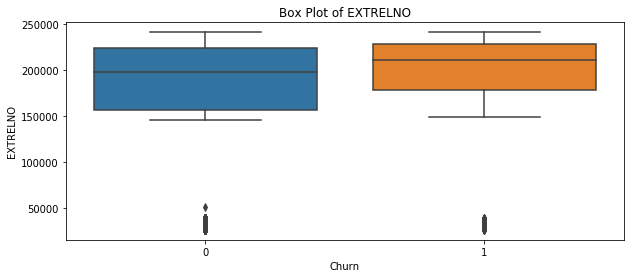

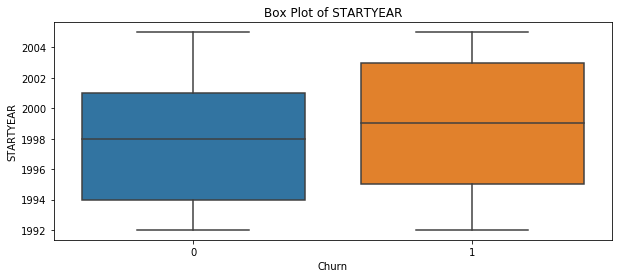

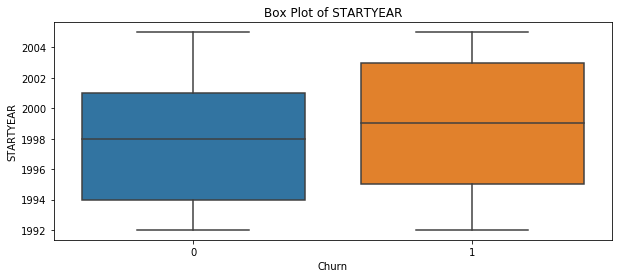

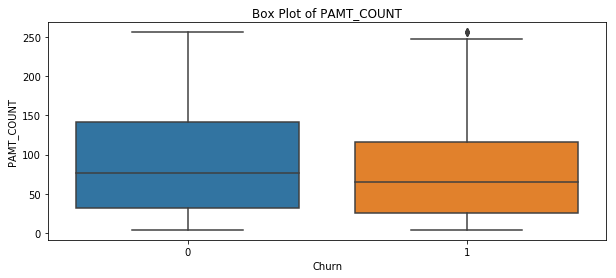

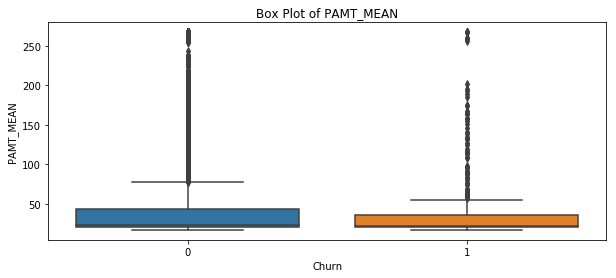

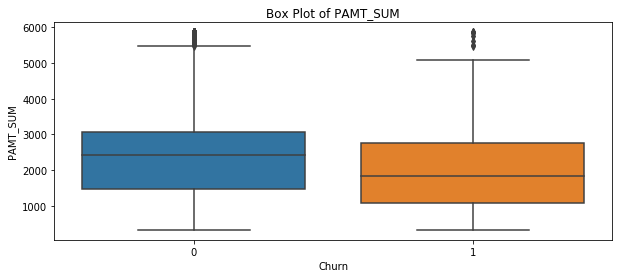

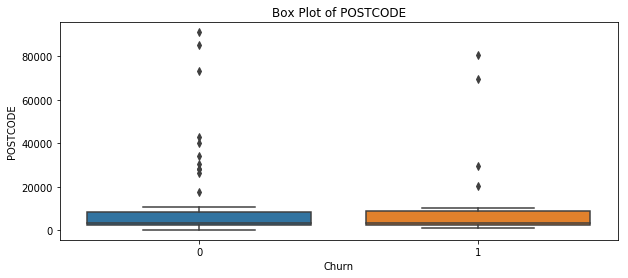

In [35]:
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
#box plot analysis
bp = PdfPages('BoxPlots with default Split.pdf')
num_vars = ['EXTRELNO','STARTYEAR','STARTYEAR','PAMT_COUNT', 'PAMT_MEAN', 'PAMT_SUM','POSTCODE']
for num_variable in num_vars:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='Churn', y=num_variable, data = data_fin)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()



In [50]:
data_fin.shape

(7181, 47)

### Variable reduction using Somer's D value

In [308]:
import statsmodels.formula.api as sm
import scipy.stats as stats
from sklearn import metrics
somersd_df = pd.DataFrame()
for num_variable in ['EXTRELNO','STARTYEAR','STARTYEAR','PAMT_COUNT', 'PAMT_MEAN', 'PAMT_SUM','POSTCODE']:  #numerical variables 
    logreg = sm.logit(formula = str('Churn ~ ')+str(num_variable), data=data_fin)
    result = logreg.fit()
    summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
#    print(y_score)
    somers_d = 2*metrics.roc_auc_score(data_fin['Churn'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.253763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.252866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.252866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.253356
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.254672
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.250906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.254631
         Iterations 7


In [309]:
somersd_df

,Variable Name,SomersD
0,EXTRELNO,0.1233
0,STARTYEAR,0.141314
0,STARTYEAR,0.141314
0,PAMT_COUNT,0.140687
0,PAMT_MEAN,0.0706743
0,PAMT_SUM,0.269152
0,POSTCODE,-0.00759604


#### Removing feature with low somersd value

In [310]:
data_fin = data_fin.drop(columns = ['POSTCODE'])

In [312]:
data_fin1 = data_fin

### Variable reduction using Variance Inflation Factor 

In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [315]:
data_fin1.dropna(inplace=True)

In [317]:
X = pd.concat([data_fin1[data_fin1.columns.difference(['Churn'])],data_fin1['Churn']], axis=1)
features = "+".join(data_fin1.columns.difference(['Churn']))
X.head()

a,b = dmatrices(formula_like='Churn ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
pd.DataFrame(vif).to_csv('delete3.csv')
print(pd.DataFrame(vif))

      VIF Factor       features
0   1.881565e+06      Intercept
1   6.637945e+00    CLASCODE_AN
2   1.092067e+00    CLASCODE_CM
3   2.284303e+02    CLASCODE_CT
4   1.209849e+01    CLASCODE_ID
5   4.663512e+00    CLASCODE_RI
6   9.878727e+00    CONTDIREC_O
7   3.451890e+00       EXTRELNO
8   1.091409e+00  LANGUACODE_NL
9   1.129955e+01  MEDIUMCODE_EM
10  2.950162e+00  MEDIUMCODE_FF
11  1.577631e+00  MEDIUMCODE_FX
12  9.618223e+01  MEDIUMCODE_LE
13  2.741685e+00  MEDIUMCODE_ME
14  3.739881e+00  MEDIUMCODE_MR
15  1.018936e+00  MEDIUMCODE_RM
16  7.910339e+00  MEDIUMCODE_TE
17  1.400731e+00  MEDIUMCODE_TM
18  1.617115e+01  MNTOPCODE_ARR
19  3.072067e+01  MNTOPCODE_CAN
20  3.432223e+01  MNTOPCODE_COR
21  2.717451e+02  MNTOPCODE_CTS
22  5.061588e+01  MNTOPCODE_DIS
23  1.505174e+00  MNTOPCODE_ENR
24  1.665460e+00  MNTOPCODE_FIC
25  4.289956e+00  MNTOPCODE_FIN
26  1.659088e+00  MNTOPCODE_IFF
27  1.812560e+00  MNTOPCODE_INF
28  1.411051e+01  MNTOPCODE_IRE
29  3.270544e+00  MNTOPCODE_PRO
30  2.88

#### Now removing gighly correlated variables

In [320]:
data_fin1 = data_fin1.drop(columns = ['MEDIUMCODE_CI'])

In [321]:
data_fin1 = data_fin1.drop(columns = ['MNTOPCODE_CTS'])

In [322]:
data_fin1 = data_fin1.drop(columns = ['CLASCODE_CT'])

In [323]:
data_fin1 = data_fin1.drop(columns = ['MEDIUMCODE_LE'])

In [324]:
data_fin1 = data_fin1.drop(columns = ['CLASCODE_ID'])

In [325]:
data_fin1 = data_fin1.drop(columns = ['NAME1TITLE_HM'])

In [326]:
data_fin1 = data_fin1.drop(columns = ['CONTDIREC_O'])

In [327]:
data_fin1['STARTYEAR'] = data_fin['STARTYEAR']

In [328]:
data_fin1 = data_fin1.drop(columns = ['CLASCODE_AN'])

In [329]:
data_fin1 = data_fin1.drop(columns = ['PAMT_COUNT'])

In [330]:
data_fin1 = data_fin1.drop(columns = ['PAMT_SUM'])

In [331]:

data_fin1 = data_fin1.drop(columns = ['MNTOPCODE_DIS'])

#### After removing variables checking again

In [332]:
X = pd.concat([data_fin1[data_fin1.columns.difference(['Churn'])],data_fin1['Churn']], axis=1)
features = "+".join(data_fin1.columns.difference(['Churn']))
X.head()

a,b = dmatrices(formula_like='Churn ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
pd.DataFrame(vif).to_csv('delete3.csv')
print(pd.DataFrame(vif))

       VIF Factor       features
0   777632.021094      Intercept
1        1.086186    CLASCODE_CM
2        2.083260    CLASCODE_RI
3        3.359600       EXTRELNO
4        1.072635  LANGUACODE_NL
5        1.987037  MEDIUMCODE_EM
6        1.204340  MEDIUMCODE_FF
7        1.054531  MEDIUMCODE_FX
8        1.082151  MEDIUMCODE_ME
9        1.138244  MEDIUMCODE_MR
10       1.002567  MEDIUMCODE_RM
11       1.670953  MEDIUMCODE_TE
12       1.263698  MEDIUMCODE_TM
13       1.010058  MNTOPCODE_ARR
14       1.021121  MNTOPCODE_CAN
15       1.009940  MNTOPCODE_COR
16       1.018289  MNTOPCODE_ENR
17       1.071334  MNTOPCODE_FIC
18       1.104377  MNTOPCODE_FIN
19       1.017296  MNTOPCODE_IFF
20       1.028558  MNTOPCODE_INF
21       1.578371  MNTOPCODE_IRE
22       1.015681  MNTOPCODE_PRO
23       1.181203  MNTOPCODE_REP
24       1.040129  MNTOPCODE_TAX
25       1.056337  MNTOPCODE_VIS
26       1.309189  MNTOPCODE_VOL
27       1.017952  MNTOPCODE_WEB
28       1.294193  NAME1TITLE_FA
29       1

##### looks ok

## Splitting table into Train, Validation and Test

In [333]:
data_fin1.head()

,EXTRELNO,Churn,STARTYEAR,PAMT_MEAN,RECENCY_DAYS,MEDIUMCODE_EM,MEDIUMCODE_FF,MEDIUMCODE_FX,MEDIUMCODE_ME,MEDIUMCODE_MR,...,MNTOPCODE_VIS,MNTOPCODE_VOL,MNTOPCODE_WEB,NAME1TITLE_FA,NAME1TITLE_HR,NAME1TITLE_JU,NAME1TITLE_MW,LANGUACODE_NL,CLASCODE_CM,CLASCODE_RI
0,26419,0,1992,45.725362,34.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,26430,1,1992,19.083082,475.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26431,0,1992,145.267143,283.0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,26443,0,1992,19.933462,19.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,26444,0,1992,19.697261,19.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [334]:
pd.DataFrame(data_fin1.corr()).to_csv('corr.csv')

In [335]:
train = data_fin1[data_fin1.STARTYEAR < 2004]
validate = data_fin1[data_fin1.STARTYEAR == 2004]
test = data_fin1[data_fin1.STARTYEAR > 2004]

In [336]:
X_train = train.drop(['Churn'], axis=1)
Y_train = train.Churn

X_validate = validate.drop(['Churn'], axis=1)
Y_validate = validate.Churn

X_test = test.drop(['Churn'], axis=1)
Y_test = test.Churn

### Logistic Regression

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
C_Value=LogisticRegression(random_state=5)
grid={'C': [.001,.01,.1,1]}

#### Finding C value using Grid Search

In [346]:
searchgrid=GridSearchCV(C_Value,grid,cv=5,scoring='recall')
searchgrid.fit(X_train,Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [347]:
print(searchgrid.best_params_)
print(searchgrid.best_score_)

{'C': 0.001}
0.5065644057179862


#### best value of parameter C is 0.001

In [348]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 0.001)
result = lg.fit(X_train, Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### METRICES TO CHECK MODEL ACCURACY

In [349]:
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, result.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, result.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, result.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = confusion_matrix(lg.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , confusion_matrix(lg.predict(X_train), Y_train))
va = confusion_matrix(lg.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , confusion_matrix(lg.predict(X_validate), Y_validate))
te = confusion_matrix(lg.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , confusion_matrix(lg.predict(X_test), Y_test))
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , accuracy_score(lg.predict(X_train), Y_train))
print ('Validation Accuracy score:' , accuracy_score(lg.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , accuracy_score(lg.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )

GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.5540830230786562
The Gini Index for the model built on the Validation Data is :  0.5065835065835065
The Gini Index for the model built on the Test Data is :  0.6414712153518123


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5690  179]
 [  35  228]]
Confusion matrix for Validation: 
 [[478  19]
 [  3  20]]
Confusion matrix for Test: 
 [[465  21]
 [  4  39]]


ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9651011089367254
Validation Accuracy score: 0.9576923076923077
Test Accuracy score: 0.9527410207939508



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9695007667405009
Sensitivity for validation da

#### Variable importance plot

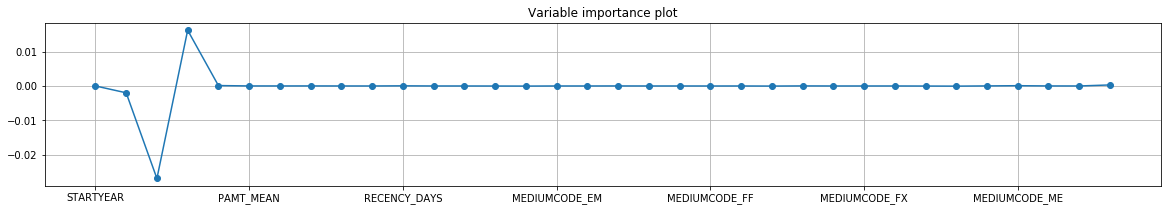

In [350]:
ax =pd.Series(searchgrid.best_estimator_.coef_.ravel()).plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o')
ax.set_xticklabels(X_train.columns);

### DECISION TREE

In [351]:
#data_fin1.to_csv('data_fin1.csv')
#data_fin.to_csv('data_fin.csv')
#data_fin1 = pd.read_csv('data_fin1.csv')
#data_fin = pd.read_csv('data_fin.csv')
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [352]:
data_fin.head()

,EXTRELNO,Churn,STARTYEAR,PAMT_COUNT,PAMT_MEAN,PAMT_SUM,RECENCY_DAYS,MEDIUMCODE_CI,MEDIUMCODE_EM,MEDIUMCODE_FF,...,NAME1TITLE_HR,NAME1TITLE_JU,NAME1TITLE_MW,LANGUACODE_NL,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_RI,CONTDIREC_O
0,26419,0,1992,69.0,45.725362,3155.05,34.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,26430,1,1992,146.0,19.083082,2786.13,475.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,26431,0,1992,21.0,145.267143,3050.61,283.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,26443,0,1992,156.0,19.933462,3109.62,19.0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,26444,0,1992,157.0,19.697261,3092.47,19.0,1,0,0,...,0,0,1,1,0,0,1,0,0,1


### Splitting data for train , validate and test as per new data( variables not reduced )

In [354]:
train = data_fin1[data_fin1.STARTYEAR < 2004]
validate = data_fin1[data_fin1.STARTYEAR == 2004]
test = data_fin1[data_fin1.STARTYEAR > 2004]
X_train = train.drop(['Churn'], axis=1)
Y_train = train.Churn

X_validate = validate.drop(['Churn'], axis=1)
Y_validate = validate.Churn

X_test = test.drop(['Churn'], axis=1)
Y_test = test.Churn

In [559]:
param_grid = {'max_depth':[3,4,5,6,7],                           #parameters
              'min_samples_split':[50,60,75,90]
              }

##### Parameter tuning to find best parametres

In [560]:
treedt = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = 5)
treedt.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [50, 60, 75, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [561]:
print(treedt.best_params_)
print(treedt.best_score_)

{'max_depth': 5, 'min_samples_split': 50}
0.9838387869114126


#### Model Building based on best parameters

In [355]:
model = tree.DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_split= 75)  #fine tuning the model

model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=75,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Evaluating Model performance

In [356]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9791258969341161
Validation Accuracy score: 0.9711538461538461
Test Accuracy score: 0.945179584120983


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.8270081435146936
The Gini Index for the model built on the Validation Data is :  0.8510048510048509
The Gini Index for the model built on the Test Data is :  0.6910803127221039


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5663   66]
 [  62  341]]
Confusion matrix for Validation: 
 [[471   5]
 [ 10  34]]
Confusion matrix for Test: 
 [[457  17]
 [ 12  43]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9884796648629778
Sensitivity for validation d

### Important Variables

In [357]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
temp

,Coefficients
RECENCY_DAYS,0.517663
PAMT_MEAN,0.385885
CLASCODE_RI,0.088980
MNTOPCODE_ARR,0.003479
EXTRELNO,0.003411
MNTOPCODE_FIN,0.000583
STARTYEAR,0.000000
MEDIUMCODE_EM,0.000000
MEDIUMCODE_FF,0.000000
MEDIUMCODE_FX,0.000000


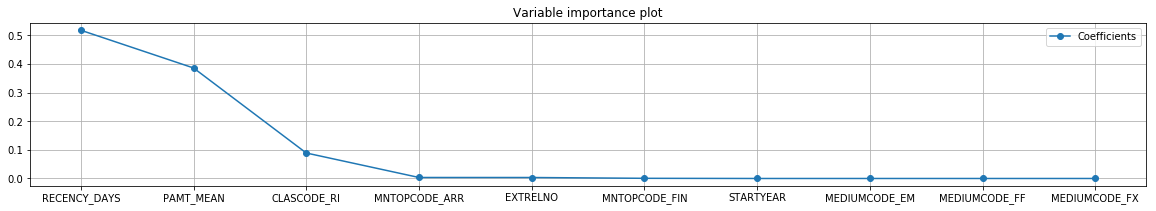

In [358]:
temp.plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

### Random Forest

In [359]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [360]:
data_fin.shape

(7181, 46)

In [168]:
RandomForestClassifier?

In [197]:
param_grid = {'max_features': ['log2'],
              'min_samples_split':[2,3,4],
              'n_estimators': [300],
              'min_samples_leaf':[8]
              }

#### Parameter tuning to find best parametres

In [198]:
tree3 = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
tree3.fit( X_train,Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['log2'], 'min_samples_split': [2, 3, 4], 'n_estimators': [300], 'min_samples_leaf': [8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [199]:
print(tree3.best_score_)
print(tree3.best_params_)

0.9533137446947437
{'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 300}


#### Model Building based on best parameters

In [361]:
model = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators= 300,min_samples_leaf= 8,min_samples_split = 4 )  #fine tuning the model

model.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Evaluating Model performance

In [362]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9647749510763209
Validation Accuracy score: 0.9557692307692308
Test Accuracy score: 0.9395085066162571


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.49211076896666395
The Gini Index for the model built on the Validation Data is :  0.4338184338184339
The Gini Index for the model built on the Test Data is :  0.4812011371712863


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5715  206]
 [  10  201]]
Confusion matrix for Validation: 
 [[480  22]
 [  1  17]]
Confusion matrix for Test: 
 [[468  31]
 [  1  29]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9652085796318189
Sensitivity for validation

### Important Variables

In [363]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
temp

,Coefficients
RECENCY_DAYS,0.511725
CLASCODE_RI,0.181398
PAMT_MEAN,0.132424
MEDIUMCODE_EM,0.047652
MNTOPCODE_TAX,0.026073
EXTRELNO,0.025233
MEDIUMCODE_TE,0.012919
STARTYEAR,0.012835
NAME1TITLE_MW,0.005089
MEDIUMCODE_ME,0.004913


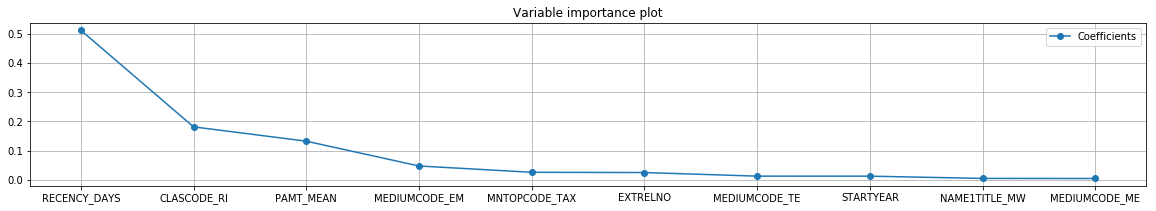

In [364]:
temp.plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

## ADABOOST

In [365]:
from sklearn.ensemble import AdaBoostClassifier

In [212]:
AdaBoostClassifier?

In [225]:
param_grid = {'learning_rate': [0.1],
              'n_estimators':[100,150,200,300]
              }

#### Paramter tuning to find best parameters

In [226]:
tree2 = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 5)
tree2.fit( X_train, Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1], 'n_estimators': [100, 150, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [227]:
print(tree2.best_score_)
print(tree2.best_params_)

0.9547828925889651
{'learning_rate': 0.1, 'n_estimators': 200}


#### Building model based on best parameters

In [366]:
model = AdaBoostClassifier( learning_rate =0.1, n_estimators=200 )  #fine tuning the model

model.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=200, random_state=None)

#### Checking Model Performance

In [367]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9734181343770385
Validation Accuracy score: 0.9711538461538461
Test Accuracy score: 0.9716446124763705


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.6725431584820232
The Gini Index for the model built on the Validation Data is :  0.7331947331947333
The Gini Index for the model built on the Test Data is :  0.8517412935323383


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5693  131]
 [  32  276]]
Confusion matrix for Validation: 
 [[476  10]
 [  5  29]]
Confusion matrix for Test: 
 [[462   8]
 [  7  52]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9775068681318682
Sensitivity for validation 

### Important Variables

In [368]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
temp

,Coefficients
RECENCY_DAYS,0.375
PAMT_MEAN,0.290
CLASCODE_RI,0.105
EXTRELNO,0.085
MNTOPCODE_CAN,0.070
MEDIUMCODE_EM,0.015
MEDIUMCODE_ME,0.010
MNTOPCODE_ARR,0.010
MNTOPCODE_FIN,0.010
MNTOPCODE_IRE,0.010


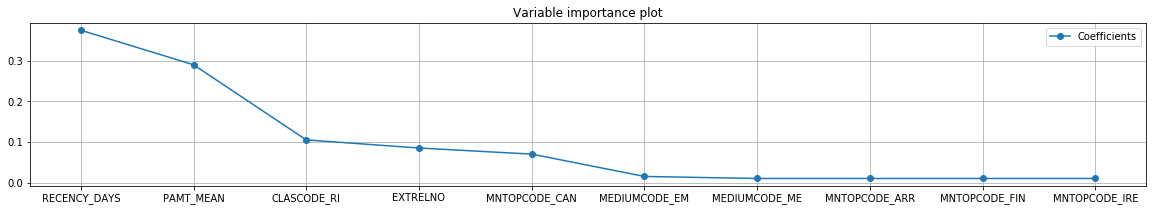

In [369]:
temp.plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

### GBM

In [370]:
from sklearn.ensemble import GradientBoostingClassifier

In [289]:
GradientBoostingClassifier?

In [328]:
param_grid = {'learning_rate':[0.1],
              'n_estimators':[70],
              'min_samples_split':[2,3,4,5],
    
                }

#### Parameter tuning to find best parameters

In [329]:
tree2 = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5)
tree2.fit( X_train, Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1], 'n_estimators': [70], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [330]:
print(tree2.best_score_)
print(tree2.best_params_)

0.9454782892588965
{'learning_rate': 0.1, 'min_samples_split': 5, 'n_estimators': 70}


#### Building model based on best parameters

In [390]:
model = GradientBoostingClassifier( learning_rate =0.1, n_estimators=70,min_samples_split = 5 )  #fine tuning the model

model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Evaluating model performance

In [391]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9856490541422048
Validation Accuracy score: 0.9711538461538461
Test Accuracy score: 0.9735349716446124


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.8294303831421734
The Gini Index for the model built on the Validation Data is :  0.8038808038808039
The Gini Index for the model built on the Test Data is :  0.8829424307036247


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5705   68]
 [  20  339]]
Confusion matrix for Validation: 
 [[473   7]
 [  8  32]]
Confusion matrix for Test: 
 [[461   6]
 [  8  54]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9882210289277672
Sensitivity for validation 

#### Important Variables

In [392]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
temp.to_csv('delete8.csv')

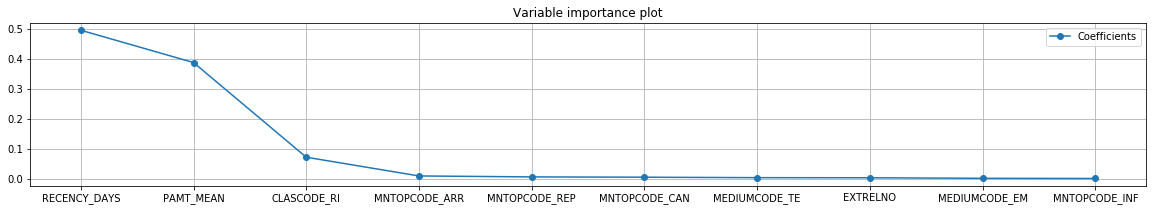

In [374]:
temp.plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

### KNN

In [375]:
from sklearn.neighbors import KNeighborsClassifier

In [439]:
KNeighborsClassifier?

In [442]:
param_grid = {'n_neighbors': np.arange(1,99,2),
              'p':[1,2]
            }

#### Parameter tuning 

In [443]:
tree2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
tree2.fit( X_train, Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97]), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [444]:
print(tree2.best_score_)
print(tree2.best_params_)

0.9337251061051257
{'n_neighbors': 91, 'p': 1}


#### Building model as per best parameters

In [376]:
model = KNeighborsClassifier(n_neighbors=91,p=1)  #fine tuning the model

model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=91, p=1,
           weights='uniform')

#### Evaluating model performance

In [377]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9336268754076973
Validation Accuracy score: 0.925
Test Accuracy score: 0.8865784499054821


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.0
The Gini Index for the model built on the Validation Data is :  0.0
The Gini Index for the model built on the Test Data is :  0.0


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5725  407]
 [   0    0]]
Confusion matrix for Validation: 
 [[481  39]
 [  0   0]]
Confusion matrix for Test: 
 [[469  60]
 [  0   0]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9336268754076973
Sensitivity for validation data :  0.925
Sensitivity for test data :  0.8865784499054

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in longlong_scalars


### NAIVE BAYES

In [378]:
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [468]:
MultinomialNB?

In [469]:
param_grid = {'alpha':[0,1]}

#### Parameter tuning to find best parametres

In [480]:
tree2 = GridSearchCV(BernoulliNB(), param_grid, cv=5)
tree2.fit( X_train, Y_train )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\s

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 1]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring=None, verbose=0)

In [481]:
print(tree2.best_score_)
print(tree2.best_params_)

0.9444988573294156
{'alpha': 0}


#### Building model as per best parameters

In [379]:
model = MultinomialNB(alpha= 0)
model.fit(X_train,Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0, class_prior=None, fit_prior=True)

#### Evaluating model performance

In [380]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9083496412263535
Validation Accuracy score: 0.948076923076923
Test Accuracy score: 0.9300567107750473


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.6736010643434223
The Gini Index for the model built on the Validation Data is :  0.7553707553707549
The Gini Index for the model built on the Test Data is :  0.7466950959488272


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5263  100]
 [ 462  307]]
Confusion matrix for Validation: 
 [[462   8]
 [ 19  31]]
Confusion matrix for Test: 
 [[444  12]
 [ 25  48]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9813537199328733
Sensitivity for validation d

### SVM    (takes a lot of execution time)

In [383]:
from sklearn.svm import SVC

In [384]:
svc = SVC()

In [7]:
svc = SVC()
param_grid = {
    'kernel': ['rbf'],
    'C': [0.01,0.1, 10, 100, 1000,10000]
}


#### Parameter tuning to find best parametres

In [500]:
svc= GridSearchCV(svc, param_grid, cv=5)
svc.fit(X_train, Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [0.01, 0.1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [501]:
print( svc.best_params_)
print(svc.best_score_)

{'C': 0.01, 'kernel': 'rbf'}
0.9337251061051257


#### Building model as per best parameters

In [385]:
model = SVC(C = 0.01, kernel= 'rbf')
model.fit(X_train,Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Evaluating model performance

In [386]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9336268754076973
Validation Accuracy score: 0.925
Test Accuracy score: 0.8865784499054821


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.0
The Gini Index for the model built on the Validation Data is :  0.0
The Gini Index for the model built on the Test Data is :  0.0


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5725  407]
 [   0    0]]
Confusion matrix for Validation: 
 [[481  39]
 [  0   0]]
Confusion matrix for Test: 
 [[469  60]
 [  0   0]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9336268754076973
Sensitivity for validation data :  0.925
Sensitivity for test data :  0.8865784499054

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in longlong_scalars


### ANN

In [387]:
from sklearn.neural_network import MLPClassifier

In [14]:
MLPClassifier?

In [15]:
param_grid = {'hidden_layer_sizes': [(5,4),(6,5),(7,6)],
          'alpha': [0.75,0.80,0.85],}

#### Parameter tuning to find best parametres

In [17]:
ann = GridSearchCV(MLPClassifier(),
                   param_grid,
                   cv=5)
ann.fit(X_train, Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\ne

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(3, 2), (4, 3), (5, 4)], 'alpha': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print(ann.best_params_)
print(ann.best_score_)

{'alpha': 0.75, 'hidden_layer_sizes': (5, 4)}
0.945315050603983


#### Building model as per best parameters

In [388]:
model = MLPClassifier(alpha= 0.75, hidden_layer_sizes= (5,4))
model.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.75, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### Evaluating model performance

In [389]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Validation Accuracy score:' , metrics.accuracy_score(model.predict(X_validate), Y_validate))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_validate, model.predict(X_validate)) - 1
print("The Gini Index for the model built on the Validation Data is : ", test_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
va = metrics.confusion_matrix(model.predict(X_validate), Y_validate)
print ('Confusion matrix for Validation: \n' , metrics.confusion_matrix(model.predict(X_validate), Y_validate))
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = va[0][0]/(va[0][0]+va[0][1])
print('Sensitivity for validation data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = va[1][1]/(va[1][0]+va[1][1])
print('Specificity for validation data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9391715590345727
Validation Accuracy score: 0.926923076923077
Test Accuracy score: 0.8865784499054821


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.11092604315311738
The Gini Index for the model built on the Validation Data is :  0.02564102564102555
The Gini Index for the model built on the Test Data is :  0.0


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[5713  361]
 [  12   46]]
Confusion matrix for Validation: 
 [[481  38]
 [  0   1]]
Confusion matrix for Test: 
 [[469  60]
 [  0   0]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9405663483701021
Sensitivity for validation data :  0.9267

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in longlong_scalars
